## Class activation map

A heatmap around the object that is being detected in the image

Using ResNet trained on ImageNet and some random image

In [ ]:
from __future__ import print_function, division
from builtins import range, input

from keras.models import Model
from keras.applications.resnet import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from glob import glob

In [ ]:
resnet = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=True)
resnet.summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [ ]:
activation_layer = resnet.get_layer('conv5_block3_out')
model = Model(inputs=resnet.input, outputs=activation_layer.output)

final_dense = resnet.get_layer('predictions')
W = final_dense.get_weights()[0]

[('n02124075', 'Egyptian_cat', 0.3274258), ('n04265275', 'space_heater', 0.19073842), ('n02123045', 'tabby', 0.10578566), ('n04152593', 'screen', 0.050117075), ('n02123597', 'Siamese_cat', 0.036942843)]


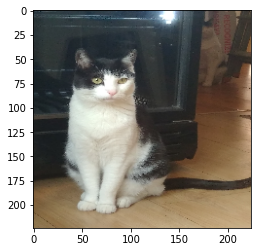

In [ ]:
img = image.load_img('image1.jpg', target_size=(224, 224))
plt.imshow(img)
x = preprocess_input(np.expand_dims(img, 0))
fmaps = model.predict(x)[0] # feature maps

probs = resnet.predict(x)
classnames = decode_predictions(probs)[0]
print(classnames) # predicted classes for this image
classname = classnames[0][1]
pred = np.argmax(probs[0])

In [ ]:
w = W[:, pred] # weights for the class
cam = fmaps.dot(w) # dot product of feature maps and weights gives class activation map
camp = sp.ndimage.zoom(cam, (8,8), order=1) # umsample 7x7 fmaps to 224x224

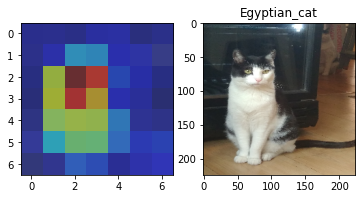

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img, alpha=0.8)
plt.imshow(cam, cmap='jet', alpha=0.5)
plt.subplot(1,2,2)
plt.imshow(img)
plt.title(classname)
plt.show()